In [20]:
import anndata
import pandas as pd

import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition
import seaborn as sns

In [3]:
dpd_scores_high_dim=pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/dpd_pmr_rct.pkl')
norm_s_df_high_dim=pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/stv_pmr_rct.pkl')

In [4]:
dpd_scores_high_dim

,DPD_pmr_rct
index_clean,
GSM5319518_AAACCCAAGGGATCAC-1,-5.883107
GSM5319518_AAACCCAGTCGATTTG-1,-6.362737
GSM5319518_AAACCCAGTCGTCAGC-1,-6.534347
GSM5319518_AAACCCAGTTGTAAAG-1,-10.943374
GSM5319518_AAACCCATCTATCGGA-1,-9.237209
...,...
GSM5319532_TTTGGTTTCATTATCC-1,3.922781
GSM5319532_TTTGGTTTCCCTCGTA-1,4.027520
GSM5319532_TTTGTTGTCAGACAAA-1,6.528109


In [5]:
norm_s_df_high_dim

,n,s
Gene,,
RP11-34P13.3,-0.000004,-3.393553e-06
FAM138A,0.000032,-4.877936e-07
OR4F5,0.000030,-1.665023e-06
RP11-34P13.7,-0.000206,-3.322524e-06
RP11-34P13.8,0.000038,-5.148021e-07
...,...,...
AC233755.2,0.000028,-1.537337e-06
AC233755.1,0.000061,-2.283255e-06
AC240274.1,0.001162,8.651420e-05


In [6]:
gbm_primary_df= pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_primary_df.pkl')
gbm_recurrent_df= pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_recurrent_df.pkl')

In [7]:
gbm_primary_df

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.002415,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273
GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.013972,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105
GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.012543,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362
GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.002542,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475
GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.002077,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5319559_TTTGGTTGTTGCCGAC-1,0.011772,0.001379,0.002151,0.055405,0.001624,0.000960,0.001734,0.003700,2.511834,0.172843,...,0.060131,0.002962,0.221142,0.001118,0.026460,0.001831,0.001478,0.106801,0.002126,0.001464
GSM5319559_TTTGGTTTCTGCATGA-1,0.004221,0.001229,0.001328,0.102611,0.001162,0.001690,0.000890,0.002611,3.699159,0.249486,...,0.010024,0.002468,0.341711,0.000817,0.020503,0.001673,0.002200,0.251644,0.001197,0.001024
GSM5319559_TTTGGTTTCTGTCCGT-1,0.005543,0.000859,0.001043,0.071865,0.001018,0.001552,0.000861,0.001949,3.118242,0.192017,...,0.009977,0.002032,0.238845,0.000840,0.015658,0.001244,0.001627,0.165016,0.000863,0.000744


In [9]:
dpd_scores_lm= pd.read_pickle('/home/jing/Desktop/gbm_dpd_scores_final.pkl')
display(dpd_scores_lm)

,DPD_pmr_rct,Source,Barcodes,Patients_id,Sample,Tumor_Normal_annotation
index_clean,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,SF2777,SF2777,Tumor
...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1,SF9494,SF9494,Normal
GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1,SF9494,SF9494,Normal
GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1,SF9494,SF9494,Tumor


In [10]:
dpd_scores_high_dim.reset_index(inplace=True)
dpd_scores_lm.reset_index(inplace=True)


In [16]:
dpd_scores_high_dim_final=dpd_scores_high_dim.merge(dpd_scores_lm[['Barcodes','Patients_id','Tumor_Normal_annotation','index_clean']],on='index_clean')
display(dpd_scores_high_dim_final)

,index_clean,DPD_pmr_rct,Barcodes,Patients_id,Tumor_Normal_annotation
0,GSM5319518_AAACCCAAGGGATCAC-1,-5.883107,AAACCCAAGGGATCAC-1,SF2777,Tumor
1,GSM5319518_AAACCCAGTCGATTTG-1,-6.362737,AAACCCAGTCGATTTG-1,SF2777,Tumor
2,GSM5319518_AAACCCAGTCGTCAGC-1,-6.534347,AAACCCAGTCGTCAGC-1,SF2777,Tumor
3,GSM5319518_AAACCCAGTTGTAAAG-1,-10.943374,AAACCCAGTTGTAAAG-1,SF2777,Tumor
4,GSM5319518_AAACCCATCTATCGGA-1,-9.237209,AAACCCATCTATCGGA-1,SF2777,Tumor
...,...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,3.922781,TTTGGTTTCATTATCC-1,SF9494,Normal
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,4.027520,TTTGGTTTCCCTCGTA-1,SF9494,Normal
55933,GSM5319532_TTTGTTGTCAGACAAA-1,6.528109,TTTGTTGTCAGACAAA-1,SF9494,Tumor
55934,GSM5319532_TTTGTTGTCCATTGGA-1,6.042014,TTTGTTGTCCATTGGA-1,SF9494,Normal


In [47]:
dpd_scores_high_dim_final.to_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/dpd_scores_high_dim_final.pkl')

In [18]:
dpd_scores_high_dim_final['zeros']=0
display(dpd_scores_high_dim_final)

,index_clean,DPD_pmr_rct,Barcodes,Patients_id,Tumor_Normal_annotation,zeros
0,GSM5319518_AAACCCAAGGGATCAC-1,-5.883107,AAACCCAAGGGATCAC-1,SF2777,Tumor,0
1,GSM5319518_AAACCCAGTCGATTTG-1,-6.362737,AAACCCAGTCGATTTG-1,SF2777,Tumor,0
2,GSM5319518_AAACCCAGTCGTCAGC-1,-6.534347,AAACCCAGTCGTCAGC-1,SF2777,Tumor,0
3,GSM5319518_AAACCCAGTTGTAAAG-1,-10.943374,AAACCCAGTTGTAAAG-1,SF2777,Tumor,0
4,GSM5319518_AAACCCATCTATCGGA-1,-9.237209,AAACCCATCTATCGGA-1,SF2777,Tumor,0
...,...,...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,3.922781,TTTGGTTTCATTATCC-1,SF9494,Normal,0
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,4.027520,TTTGGTTTCCCTCGTA-1,SF9494,Normal,0
55933,GSM5319532_TTTGTTGTCAGACAAA-1,6.528109,TTTGTTGTCAGACAAA-1,SF9494,Tumor,0
55934,GSM5319532_TTTGTTGTCCATTGGA-1,6.042014,TTTGTTGTCCATTGGA-1,SF9494,Normal,0


<Axes: xlabel='zeros', ylabel='DPD_pmr_rct'>

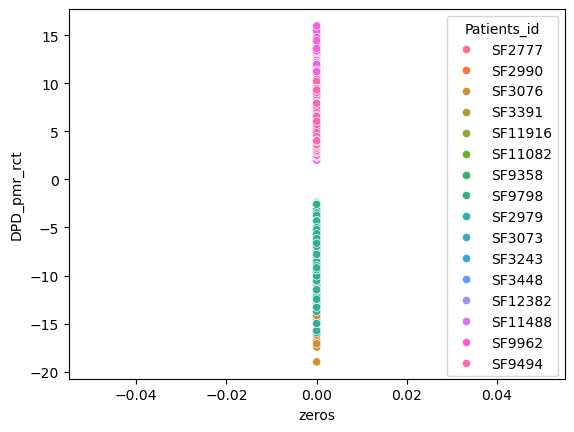

In [21]:
sns.scatterplot(x='zeros',y='DPD_pmr_rct',data=dpd_scores_high_dim_final,hue='Patients_id')

<Axes: xlabel='zeros', ylabel='DPD_pmr_rct'>

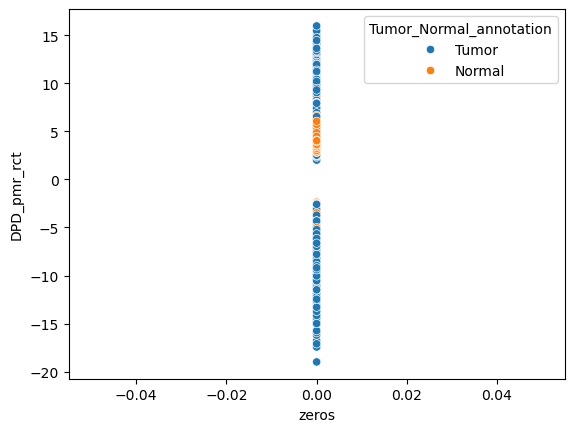

In [22]:
sns.scatterplot(x='zeros',y='DPD_pmr_rct',data=dpd_scores_high_dim_final,hue='Tumor_Normal_annotation')

## SVMs on normal and tumor

In [24]:
gbm_primary_df.reset_index(inplace=True)
gbm_recurrent_df.reset_index(inplace=True)

In [25]:
gbm_primary_annotated_df=gbm_primary_df.merge(dpd_scores_high_dim_final[['index_clean','Tumor_Normal_annotation']],on='index_clean')
gbm_recurrent_annotated_df=gbm_recurrent_df.merge(dpd_scores_high_dim_final[['index_clean','Tumor_Normal_annotation']],on='index_clean')

In [28]:
gbm_primary_tumor_df=gbm_primary_annotated_df[gbm_primary_annotated_df['Tumor_Normal_annotation']=='Tumor']
gbm_primary_normal_df=gbm_primary_annotated_df[gbm_primary_annotated_df['Tumor_Normal_annotation']=='Normal']

In [31]:
gbm_recurrent_tumor_df=gbm_recurrent_annotated_df[gbm_recurrent_annotated_df['Tumor_Normal_annotation']=='Tumor']
gbm_recurrent_normal_df=gbm_recurrent_annotated_df[gbm_recurrent_annotated_df['Tumor_Normal_annotation']=='Normal']

In [33]:
gbm_recurrent_normal_df

,index_clean,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Tumor_Normal_annotation
0,GSM5319548_AAACCCAAGATCCGAG-1,0.000258,0.000202,0.000310,0.011044,0.000349,0.003671,0.002316,0.000870,0.867930,...,0.000430,0.063102,0.000100,0.001016,0.000266,0.000176,0.101162,0.000110,0.000215,Normal
2,GSM5319548_AAACCCACATTGAGGG-1,0.002811,0.000344,0.000688,0.004631,0.000344,0.000464,0.000376,0.002343,1.026481,...,0.000369,0.182391,0.000214,0.003473,0.000428,0.000488,0.116505,0.000325,0.000393,Normal
4,GSM5319548_AAACGAATCGCTTACC-1,0.001030,0.000449,0.000321,0.007496,0.000332,0.000410,0.000473,0.001536,0.757773,...,0.001690,0.069119,0.000175,0.000572,0.000348,0.000302,0.169771,0.000192,0.000347,Normal
7,GSM5319548_AAACGCTCAGAAGCTG-1,0.000918,0.000275,0.000259,0.005340,0.000292,0.000494,0.000287,0.001886,0.855680,...,0.001139,0.043562,0.000118,0.001075,0.000273,0.000219,0.125632,0.000160,0.000255,Normal
13,GSM5319548_AAAGAACCATCATTGG-1,0.001127,0.000440,0.000575,0.007786,0.000483,0.000345,0.000400,0.002430,0.793644,...,0.000406,0.046099,0.000352,0.001325,0.000638,0.000415,0.098433,0.000346,0.000488,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27407,GSM5319532_TTTGGTTGTGTCCTAA-1,0.000526,0.000320,0.000222,0.022245,0.000202,0.000867,0.000296,0.000318,0.543907,...,0.000633,0.046236,0.000144,0.007802,0.000258,0.000205,0.060238,0.000148,0.000301,Normal
27408,GSM5319532_TTTGGTTTCACACCCT-1,0.000421,0.000368,0.000243,0.017500,0.000241,0.000498,0.000263,0.000309,0.590332,...,0.000726,0.103069,0.000187,0.003249,0.000388,0.000215,0.065257,0.000184,0.000282,Normal
27409,GSM5319532_TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,...,0.000714,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296,Normal
27410,GSM5319532_TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,...,0.000912,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296,Normal


In [36]:
gbm_recurrent_tumor_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_recurrent_tumor_high_dim.pkl')
gbm_recurrent_normal_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_recurrent_normal_high_dim.pkl')

In [39]:
gbm_primary_tumor_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_primary_tumor_high_dim.pkl')
gbm_primary_normal_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_primary_normal_high_dim.pkl')

In [42]:
gbm_primary_tumor_df

,index_clean,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Tumor_Normal_annotation
0,GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,...,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273,Tumor
1,GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,...,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105,Tumor
2,GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,...,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362,Tumor
3,GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,...,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475,Tumor
4,GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,...,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,GSM5319559_TTTGGTTGTTGCCGAC-1,0.011772,0.001379,0.002151,0.055405,0.001624,0.000960,0.001734,0.003700,2.511834,...,0.002962,0.221142,0.001118,0.026460,0.001831,0.001478,0.106801,0.002126,0.001464,Tumor
28518,GSM5319559_TTTGGTTTCTGCATGA-1,0.004221,0.001229,0.001328,0.102611,0.001162,0.001690,0.000890,0.002611,3.699159,...,0.002468,0.341711,0.000817,0.020503,0.001673,0.002200,0.251644,0.001197,0.001024,Tumor
28519,GSM5319559_TTTGGTTTCTGTCCGT-1,0.005543,0.000859,0.001043,0.071865,0.001018,0.001552,0.000861,0.001949,3.118242,...,0.002032,0.238845,0.000840,0.015658,0.001244,0.001627,0.165016,0.000863,0.000744,Tumor
28520,GSM5319559_TTTGTTGAGATGACAT-1,0.007039,0.000535,0.001000,0.038810,0.000696,0.000462,0.000621,0.001528,2.925960,...,0.000855,0.311672,0.000691,0.034091,0.000903,0.000848,0.163477,0.000658,0.000572,Tumor


In [44]:
gbm_recurrent_tumor_df

,index_clean,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Tumor_Normal_annotation
1,GSM5319548_AAACCCACAAGAGGCT-1,0.001209,0.000453,0.000535,0.005697,0.000440,0.000224,0.000422,0.007191,1.019019,...,0.000222,0.191374,0.000286,0.001546,0.000556,0.000574,0.121346,0.000338,0.000346,Tumor
3,GSM5319548_AAACGAAAGCAGTAAT-1,0.001072,0.000360,0.000462,0.007534,0.000441,0.000430,0.000347,0.010429,1.049155,...,0.000323,0.179999,0.000264,0.001125,0.000489,0.000586,0.172144,0.000263,0.000332,Tumor
5,GSM5319548_AAACGAATCGTTCCTG-1,0.000598,0.000183,0.000159,0.002481,0.000168,0.000140,0.000163,0.002147,0.742125,...,0.000123,0.127151,0.000131,0.001404,0.000198,0.000148,0.173601,0.000126,0.000111,Tumor
6,GSM5319548_AAACGCTCAAATGAGT-1,0.001899,0.000228,0.000360,0.005274,0.000253,0.000156,0.000330,0.005306,0.883423,...,0.000165,0.145205,0.000358,0.003404,0.000277,0.000260,0.223890,0.000189,0.000193,Tumor
8,GSM5319548_AAACGCTCAGCCCAGT-1,0.002106,0.000608,0.000673,0.004021,0.000585,0.000580,0.000441,0.007601,0.949742,...,0.000409,0.163357,0.000343,0.002022,0.000768,0.000629,0.118510,0.000399,0.000446,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27394,GSM5319532_TTTCGATCACTCTGCT-1,0.001662,0.000141,0.000309,0.012650,0.000183,0.000310,0.000163,0.000304,0.692797,...,0.000138,0.061038,0.000178,0.012495,0.000332,0.000225,0.049226,0.000197,0.000140,Tumor
27395,GSM5319532_TTTCGATGTGTCCTAA-1,0.001050,0.000132,0.000277,0.008983,0.000234,0.000544,0.000116,0.000430,0.636513,...,0.000181,0.035690,0.000185,0.007167,0.000354,0.000262,0.056663,0.000235,0.000163,Tumor
27398,GSM5319532_TTTGACTGTTATGTGC-1,0.000791,0.000047,0.000105,0.005697,0.000058,0.000097,0.000042,0.000205,0.426868,...,0.000082,0.046288,0.000058,0.003130,0.000128,0.000065,0.031249,0.000086,0.000049,Tumor
27411,GSM5319532_TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,...,0.000664,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494,Tumor


In [45]:
gbm_primary_tumor_df

,index_clean,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Tumor_Normal_annotation
0,GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,...,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273,Tumor
1,GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,...,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105,Tumor
2,GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,...,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362,Tumor
3,GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,...,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475,Tumor
4,GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,...,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,GSM5319559_TTTGGTTGTTGCCGAC-1,0.011772,0.001379,0.002151,0.055405,0.001624,0.000960,0.001734,0.003700,2.511834,...,0.002962,0.221142,0.001118,0.026460,0.001831,0.001478,0.106801,0.002126,0.001464,Tumor
28518,GSM5319559_TTTGGTTTCTGCATGA-1,0.004221,0.001229,0.001328,0.102611,0.001162,0.001690,0.000890,0.002611,3.699159,...,0.002468,0.341711,0.000817,0.020503,0.001673,0.002200,0.251644,0.001197,0.001024,Tumor
28519,GSM5319559_TTTGGTTTCTGTCCGT-1,0.005543,0.000859,0.001043,0.071865,0.001018,0.001552,0.000861,0.001949,3.118242,...,0.002032,0.238845,0.000840,0.015658,0.001244,0.001627,0.165016,0.000863,0.000744,Tumor
28520,GSM5319559_TTTGTTGAGATGACAT-1,0.007039,0.000535,0.001000,0.038810,0.000696,0.000462,0.000621,0.001528,2.925960,...,0.000855,0.311672,0.000691,0.034091,0.000903,0.000848,0.163477,0.000658,0.000572,Tumor


In [43]:
pd.concat([gbm_recurrent_tumor_df,gbm_primary_tumor_df],axis=0)

,index_clean,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Tumor_Normal_annotation
1,GSM5319548_AAACCCACAAGAGGCT-1,0.001209,0.000453,0.000535,0.005697,0.000440,0.000224,0.000422,0.007191,1.019019,...,0.000222,0.191374,0.000286,0.001546,0.000556,0.000574,0.121346,0.000338,0.000346,Tumor
3,GSM5319548_AAACGAAAGCAGTAAT-1,0.001072,0.000360,0.000462,0.007534,0.000441,0.000430,0.000347,0.010429,1.049155,...,0.000323,0.179999,0.000264,0.001125,0.000489,0.000586,0.172144,0.000263,0.000332,Tumor
5,GSM5319548_AAACGAATCGTTCCTG-1,0.000598,0.000183,0.000159,0.002481,0.000168,0.000140,0.000163,0.002147,0.742125,...,0.000123,0.127151,0.000131,0.001404,0.000198,0.000148,0.173601,0.000126,0.000111,Tumor
6,GSM5319548_AAACGCTCAAATGAGT-1,0.001899,0.000228,0.000360,0.005274,0.000253,0.000156,0.000330,0.005306,0.883423,...,0.000165,0.145205,0.000358,0.003404,0.000277,0.000260,0.223890,0.000189,0.000193,Tumor
8,GSM5319548_AAACGCTCAGCCCAGT-1,0.002106,0.000608,0.000673,0.004021,0.000585,0.000580,0.000441,0.007601,0.949742,...,0.000409,0.163357,0.000343,0.002022,0.000768,0.000629,0.118510,0.000399,0.000446,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,GSM5319559_TTTGGTTGTTGCCGAC-1,0.011772,0.001379,0.002151,0.055405,0.001624,0.000960,0.001734,0.003700,2.511834,...,0.002962,0.221142,0.001118,0.026460,0.001831,0.001478,0.106801,0.002126,0.001464,Tumor
28518,GSM5319559_TTTGGTTTCTGCATGA-1,0.004221,0.001229,0.001328,0.102611,0.001162,0.001690,0.000890,0.002611,3.699159,...,0.002468,0.341711,0.000817,0.020503,0.001673,0.002200,0.251644,0.001197,0.001024,Tumor
28519,GSM5319559_TTTGGTTTCTGTCCGT-1,0.005543,0.000859,0.001043,0.071865,0.001018,0.001552,0.000861,0.001949,3.118242,...,0.002032,0.238845,0.000840,0.015658,0.001244,0.001627,0.165016,0.000863,0.000744,Tumor
28520,GSM5319559_TTTGTTGAGATGACAT-1,0.007039,0.000535,0.001000,0.038810,0.000696,0.000462,0.000621,0.001528,2.925960,...,0.000855,0.311672,0.000691,0.034091,0.000903,0.000848,0.163477,0.000658,0.000572,Tumor
